In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [13]:
def plotImage(I, title,figSize = (12,12)):
    I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figSize)
    plt.title(title)
    plt.imshow(I)
    plt.axis('off')
    plt.show()

1)\
The model is a fully convoluted network. It can be broadly divided into 2 parts, the first part has a series of convolutions  and max pooling layers that downsample the image and in the process get deep-features. This is followed by the part that is responsible for upsampling the image to generate a mask.


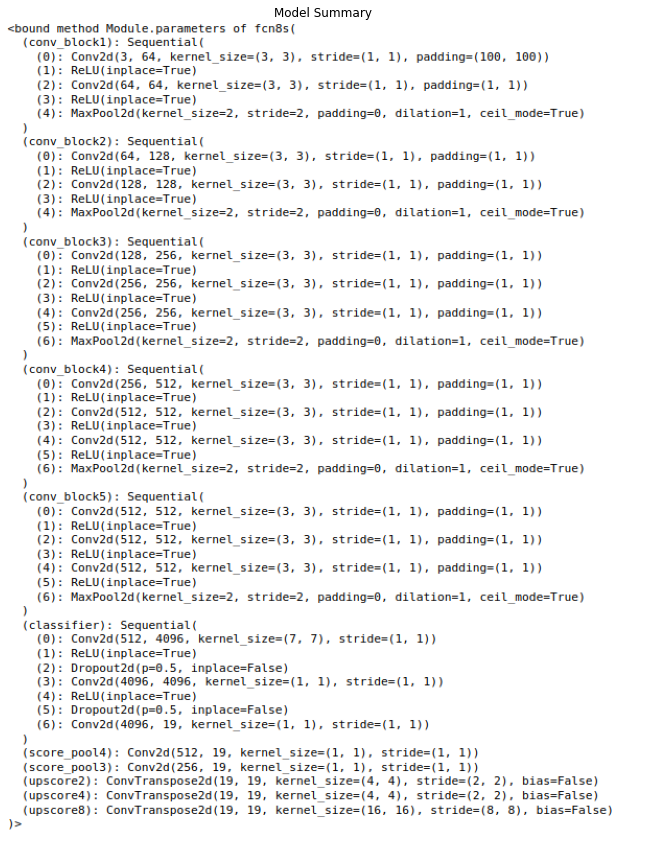

In [24]:
plotImage(cv2.imread('Model_summary.png'), 'Model Summary',(15,15))

2)\
We are initializing the models using the parameters of a pretrained VGG16 model.

3)
Training Loss

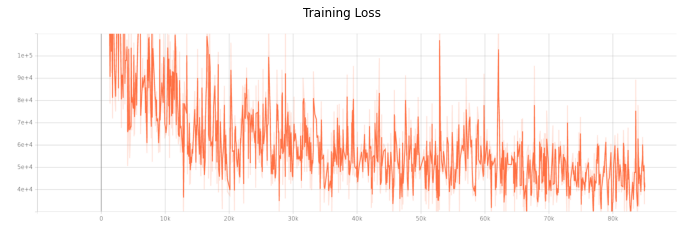

In [15]:
plotImage(cv2.imread('Training_Loss.png'), 'Training Loss')

Validation Loss

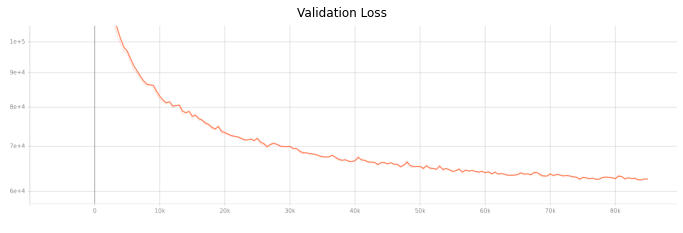

In [16]:
plotImage(cv2.imread('Validation_loss.png'),'Validation Loss')

4)\
Following are the results on the validation set.
It is evident that class 0 i.e. The class "ROADS" have the best performance. On the other hand, the classes 'RIDER' and 'MOTORCYLE' have the worst performance

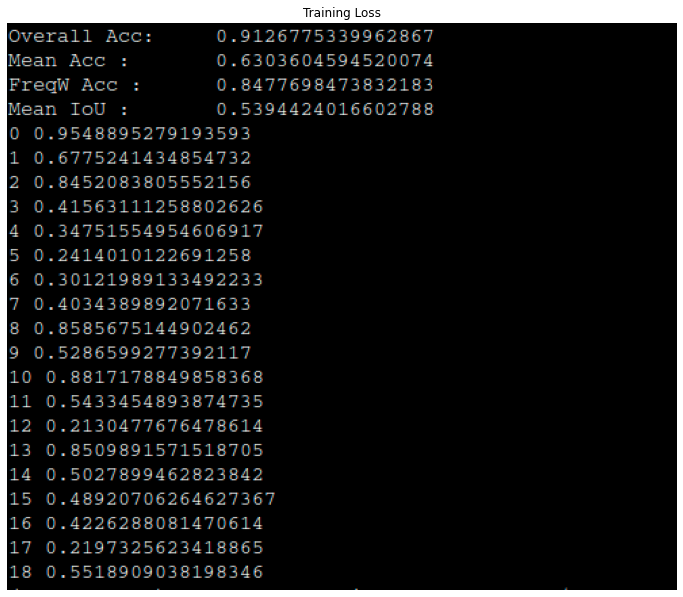

In [17]:
plotImage(cv2.imread('Validation_Run.png'), 'Training Loss')

The paper used 4 metrics to quabtify the results of the model - \
1.Pixel Accuracy\
2.Mean Accuracy\
3.Mean Intersection over Union (IoU)\
4.Frequency weighted IoU

5)\
Code to visualize model results on a test image

In [18]:
# Define colors and labels
colors = [[  0,   0,   0],
        [128, 64, 128],
        [244, 35, 232],
        [70, 70, 70],
        [102, 102, 156],
        [190, 153, 153],
        [153, 153, 153],
        [250, 170, 30],
        [220, 220, 0],
        [107, 142, 35],
        [152, 251, 152],
        [0, 130, 180],
        [220, 20, 60],
        [255, 0, 0],
        [0, 0, 142],
        [0, 0, 70],
        [0, 60, 100],
        [0, 80, 100],
        [0, 0, 230],
        [119, 11, 32],
    ]

class_names = [
        "unlabelled",
        "road",
        "sidewalk",
        "building",
        "wall",
        "fence",
        "pole",
        "traffic_light",
        "traffic_sign",
        "vegetation",
        "terrain",
        "sky",
        "person",
        "rider",
        "car",
        "truck",
        "bus",
        "train",
        "motorcycle",
        "bicycle",
    ]
colors = np.array(colors)
colors = colors/255

Function to plot  mask

In [19]:
def plotMask(I, title):
    plt.figure(figsize=(12,12))
    I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    plt.imshow(I)
    plt.axis('off')
    plt.title(title)

    patches =[mpatches.Patch(color=colors[i],label=class_names[i]) for i in range(len(class_names))]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
    plt.show()

In [20]:
def decode_segmap(temp, label_colours):
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0, 20):
        r[temp == l] = label_colours[l][0]
        g[temp == l] = label_colours[l][1]
        b[temp == l] = label_colours[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    print(rgb.shape)
    print(r.shape)
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb

Original image and predicted mask on 2 test images

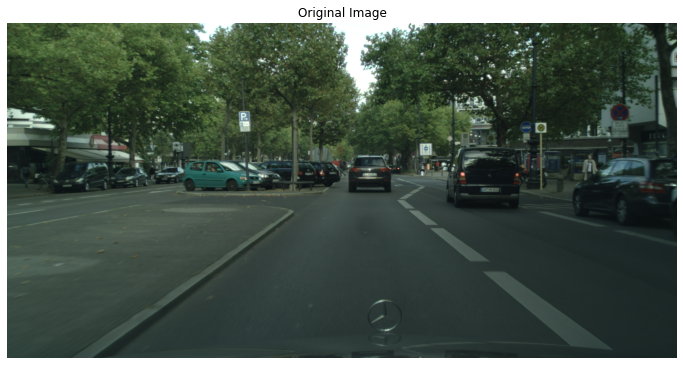

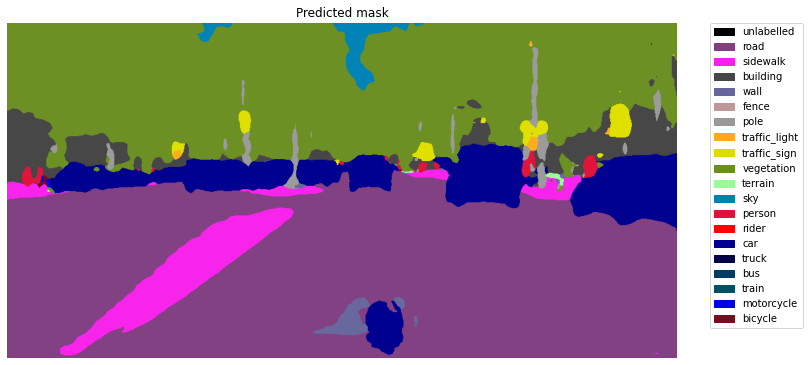

In [21]:
I_test_1 = cv2.imread('berlin_000001_000019_leftImg8bit.png')
plotImage(I_test_1,'Original Image')

I_test_1_mask = cv2.imread('berlin_001_op.png')
plotMask(I_test_1_mask, 'Predicted mask')

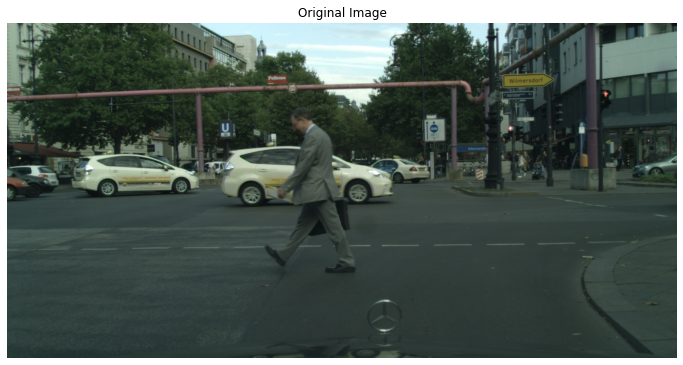

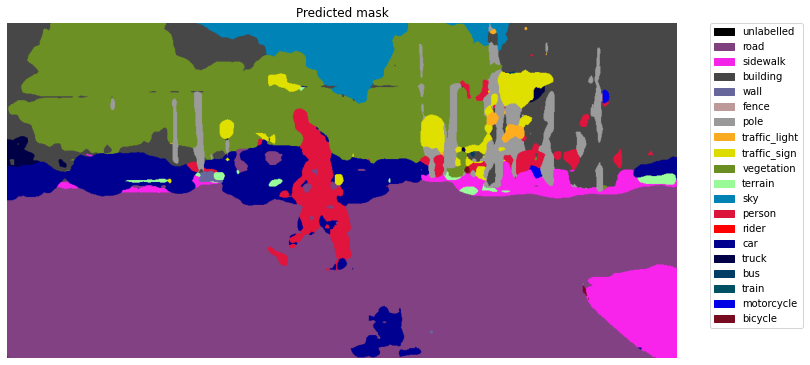

In [22]:
I_test_1 = cv2.imread('berlin_000002_000019_leftImg8bit.png')
plotImage(I_test_1,'Original Image')

I_test_1_mask = cv2.imread('berlin_002_op.png')
plotMask(I_test_1_mask, 'Predicted mask')

6)
Test image out of dataset with predicted msak

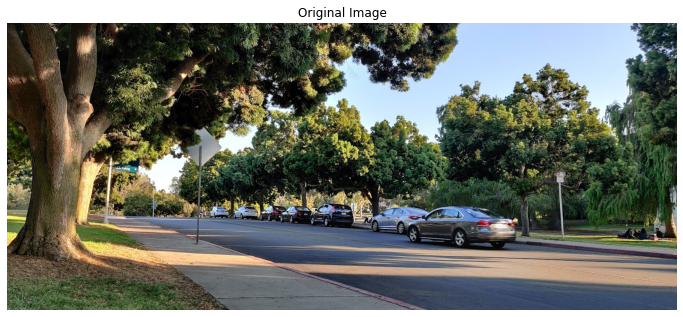

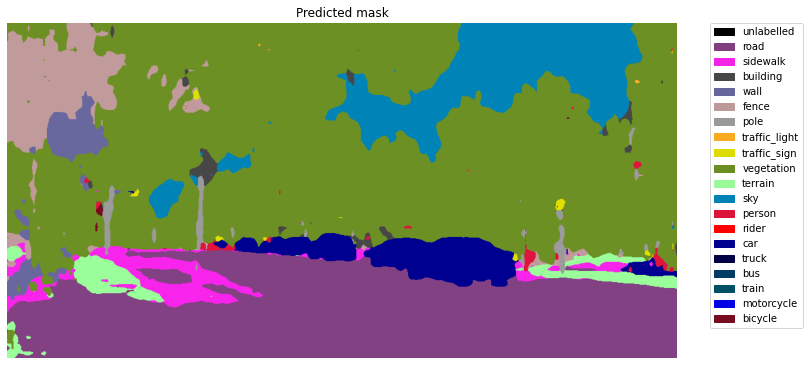

In [23]:
I_test_1 = cv2.imread('test_phone.png')
plotImage(I_test_1,'Original Image')

I_test_1_mask = cv2.imread('test_op.png')
plotMask(I_test_1_mask, 'Predicted mask')

7)\
The output of the model can be imporoved in following ways - 

Making architecture improvements like the U-Net will improve the performance by providing relevant contextual information in the upsampling part of the network.

Use of more sophisticated convolutions like dilated convolution as done in deeplab v3